<p style="background: linear-gradient(to right,#FF407D,white);
          color: transparent;
          font-family: Georgia;
          color: white;
          font-size: 80%;
          text-align: left;
          padding: 8px;
          letter-spacing:1px;">
   Accuracy in the end: 76% 
</p>

<p style="background: linear-gradient(to right,#4793AF,white);
          color: transparent;
          font-family: Georgia;
          color: white;
          font-size: 120%;
          text-align: left;
          padding: 15px;
          letter-spacing:1px;">
   Table of Content 
</p>

1. Importing Libraries
2. Loading the Dataset
3. About the Dataset
4. Understanding the Dataset
5. Feature Engineering
    - Creating New Features
6. Exploratory Data Analysis
    - Frequency Distribution
7. Data Preprocessing
    - Handling Missing Values
    - Log Transformation
    - Feature Encoding
    - Creating training and testing sets
8. Machine Learning
    - Training with un-scaled features
    - Training with scaled features
    - Models' Performance Comparision
    - Hyperparameter Tuning
9. Conclusion

<p style="background: linear-gradient(to right,#4793AF,white);
          color: transparent;
          font-family: Georgia;
          color: white;
          font-size: 120%;
          text-align: left;
          padding: 15px;
          letter-spacing:1px;">
   1. Importing Libraries 
</p>

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from lightgbm import LGBMClassifier

<p style="background: linear-gradient(to right,#4793AF,white);
          color: transparent;
          font-family: Georgia;
          color: white;
          font-size: 120%;
          text-align: left;
          padding: 15px;
          letter-spacing:1px;">
   2. Loading the Dataset 
</p>

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<p style="background: linear-gradient(to right,#4793AF,white);
          color: transparent;
          font-family: Georgia;
          color: white;
          font-size: 120%;
          text-align: left;
          padding: 15px;
          letter-spacing:1px;">
   3. About the Dataset
</p>

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.


<img src="https://storage.googleapis.com/kaggle-media/competitions/Spaceship%20Titanic/joel-filipe-QwoNAhbmLLo-unsplash.jpg"></img>



<table style = 'width: 100%;'>
  <tr>
    <th style = 'text-align: center;
                background: white;
                border: solid black 1px;'>Feature</th>
    <th style = 'text-align: center;
                background: white;
                border: solid black 1px;'>Values</th>
  </tr>
  <tr>
        <td style = 'text-align: center;
                        font-weight: 700;
                        background: white;
                        border: solid black 1px;'>
                        train.csv</td>
        <td style = 'text-align: left;
                        background: white;
                        border: solid black 1px;'>
                        Personal records for about two-thirds (~ 8700) of the passengers, to be used as training data.</td>
        </tr>
  <tr>
        <td style = 'text-align: center;
                        font-weight: 700;
                        background: white;
                        border: solid black 1px;'>
                        PassengerId</td>
        <td style = 'text-align: left;
                        background: white;
                        border: solid black 1px;'>
                        A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.</td>
        </tr>
  <tr>
        <td style = 'text-align: center;
                        font-weight: 700;
                        background: white;
                        border: solid black 1px;'>
                        HomePlanet</td>
        <td style = 'text-align: left;
                        background: white;
                        border: solid black 1px;'>
                        The planet the passenger departed from, typically their planet of permanent residence.</td>
        </tr>
  <tr>
        <td style = 'text-align: center;
                        font-weight: 700;
                        background: white;
                        border: solid black 1px;'>
                        CryoSleep</td>
        <td style = 'text-align: left;
                        background: white;
                        border: solid black 1px;'>
                        Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.</td>
        </tr>
  <tr>
        <td style = 'text-align: center;
                        font-weight: 700;
                        background: white;
                        border: solid black 1px;'>
                        Cabin</td>
        <td style = 'text-align: left;
                        background: white;
                        border: solid black 1px;'>
                        The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.</td>
        </tr>
  <tr>
        <td style = 'text-align: center;
                        font-weight: 700;
                        background: white;
                        border: solid black 1px;'>
                        Destination</td>
        <td style = 'text-align: left;
                        background: white;
                        border: solid black 1px;'>
                        The planet the passenger will be debarking to.</td>
        </tr>
  <tr>
        <td style = 'text-align: center;
                        font-weight: 700;
                        background: white;
                        border: solid black 1px;'>
                        Age</td>
        <td style = 'text-align: left;
                        background: white;
                        border: solid black 1px;'>
                        The age of the passenger.</td>
        </tr>
  <tr>
        <td style = 'text-align: center;
                        font-weight: 700;
                        background: white;
                        border: solid black 1px;'>
                        VIP</td>
        <td style = 'text-align: left;
                        background: white;
                        border: solid black 1px;'>
                        Whether the passenger has paid for special VIP service during the voyage.</td>
        </tr>
  <tr>
        <td style = 'text-align: center;
                        font-weight: 700;
                        background: white;
                        border: solid black 1px;'>
                        RoomService, FoodCourt, ShoppingMall, Spa, VRDeck</td>
        <td style = 'text-align: left;
                        background: white;
                        border: solid black 1px;'>
                        Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.</td>
        </tr>
  <tr>
        <td style = 'text-align: center;
                        font-weight: 700;
                        background: white;
                        border: solid black 1px;'>
                        Name</td>
        <td style = 'text-align: left;
                        background: white;
                        border: solid black 1px;'>
                        The first and last names of the passenger.</td>
        </tr>
  <tr>
        <td style = 'text-align: center;
                        font-weight: 700;
                        background: white;
                        border: solid black 1px;'>
                        Transported</td>
        <td style = 'text-align: left;
                        background: white;
                        border: solid black 1px;'>
                        Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.</td>
        </tr>
  <tr>
        <td style = 'text-align: center;
                        font-weight: 700;
                        background: white;
                        border: solid black 1px;'>
                        test.csv</td>
        <td style = 'text-align: left;
                        background: white;
                        border: solid black 1px;'>
                        Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.</td>
        </tr>
</table>

<p style="background: linear-gradient(to right,#4793AF,white);
          color: transparent;
          font-family: Georgia;
          color: white;
          font-size: 120%;
          text-align: left;
          padding: 15px;
          letter-spacing:1px;">
   4. Understanding the Dataset
</p>

In [3]:
# dropping the name column because it's useless
df.drop(['Name'], axis=1, inplace=True)



In [4]:
df.shape

(8693, 13)

In [5]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Min age is 0 which can't be possible

In [6]:
(df['Age'] == 0).sum()

178

In [7]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

Lots of missing values. Let's fix it a little later

<p style="background: linear-gradient(to right,#4793AF,white);
          color: transparent;
          font-family: Georgia;
          color: white;
          font-size: 120%;
          text-align: left;
          padding: 15px;
          letter-spacing:1px;">
   5. Feature Engineering
</p>

In [8]:
# number of unique values in each column
for col in df.columns:
    print(col, '-' * (20-len(col)), df[col].nunique())

PassengerId --------- 8693
HomePlanet ---------- 3
CryoSleep ----------- 2
Cabin --------------- 6560
Destination --------- 3
Age ----------------- 80
VIP ----------------- 2
RoomService --------- 1273
FoodCourt ----------- 1507
ShoppingMall -------- 1115
Spa ----------------- 1327
VRDeck -------------- 1306
Transported --------- 2


Cabin is a categorical features which has like 6500 unique items. So we gotta take care of that. Also we have to take care of the Passenger_Id because with its current state, it's useless

<div style="display: flex; 
            align-items: center;">
  <div style="width: 30px; 
              height: 40px; 
              background-color: #4793AF;
              color: white;
              font-size: 70%;
              text-align: center;
              padding-top: 10px;">
      FE
  </div>
  <p style="background: linear-gradient(to right,#FC819E,white);
            color: transparent;
            font-family: Georgia;
            color: white;
            font-size: 100%;
            text-align: left;
            padding: 10px;
            width: 100%;
            letter-spacing:1px;
            margin: 0;">
      Creating New Features
  </p>
</div>


<div style="display: flex; 
            align-items: center;">
  <p style="background: linear-gradient(to right,#FFE6E6,white);
            color: transparent;
            font-family: Georgia;
            color: black;
            font-size: 80%;
            text-align: left;
            padding: 5px;
            padding-left: 10px;
            width: 1000%;
            letter-spacing:1px;
            margin: 0px;">
      PassengerId feature
  </p>
</div>

PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
Let's create new features
- 'Group_Size': Indicates the number of people in that group
- 'Travelling_Solo': Whether or not they're alone



In [9]:
df['Group'] = df['PassengerId'].str[:4]
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004


When how='left', it means that all the rows from the left DataFrame (the one specified first in the pd.merge() function) are retained in the resulting DataFrame, and matching rows from the right DataFrame are merged based on the specified keys. If there are no matching rows in the right DataFrame, the corresponding columns will have NaN values.


In [10]:
group_sizes = df['Group'].value_counts().reset_index()
group_sizes.columns = ['Group', 'Group_Size']

df = pd.merge(df, group_sizes, on='Group', how='left')

In [11]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group,Group_Size
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,1


In [12]:
df['Travelling_Solo'] = (df['Group_Size'] == 1).astype(int)

In [13]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group,Group_Size,Travelling_Solo
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,1,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,2,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,2,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,1,1


In [14]:
# dropping the column 'Group' and 'PassengerId' because it served its purpose
df.drop(['Group', 'PassengerId'], axis=1, inplace=True)


<div style="display: flex; 
            align-items: center;">
  <p style="background: linear-gradient(to right,#FFE6E6,white);
            color: transparent;
            font-family: Georgia;
            color: black;
            font-size: 70%;
            text-align: left;
            padding: 5px;
            padding-left: 10px;
            width: 1000%;
            letter-spacing:1px;
            margin: 0px;">
      Cabin Feature
  </p>
</div>

We know that cabin feature consists of deck/num/side , where deck is deck loacation, num is deck_number and side can be P for port or S for Starboard.

We can separate all these 3 values from cabin & create three new features Cabin_Deck, Cabin_Number & Cabin_Side.

In [15]:
df['Cabin'].isnull().sum()

199

We also have to take care of these missing values

In [16]:
(df['Cabin'].str.contains('xyz')).sum()

0

In [17]:
df['Cabin'].fillna('xyz/xyz/xyz', inplace=True)

In [18]:
df['Cabin_Deck'] = df['Cabin'].apply(lambda x: x.split('/')[0])
df['Cabin_Number'] = df['Cabin'].apply(lambda x: x.split('/')[1])
df['Cabin_Side'] = df['Cabin'].apply(lambda x: x.split('/')[2])

In [19]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group_Size,Travelling_Solo,Cabin_Deck,Cabin_Number,Cabin_Side
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,1,B,0,P
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,1,F,0,S
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,2,0,A,0,S
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,2,0,A,0,S
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,1,F,1,S


In [20]:
# We filled the missing values with xyz so let's replace them with the mode of the feature

df['Cabin_Deck'] = df['Cabin_Deck'].replace('xyz', df['Cabin_Deck'].mode()[0])
df['Cabin_Side'] = df['Cabin_Side'].replace('xyz', df['Cabin_Side'].mode()[0])



In [21]:
# since this column is numerical. Replace the missing values with the median
# first, we replace them with np.nan so that we can get the median value 
# otherwise it'd throw an error because it won't recognize the string 'xyz'

df['Cabin_Number'] = df['Cabin_Number'].replace('xyz', np.nan)
df['Cabin_Number'] = df['Cabin_Number'].fillna(df['Cabin_Number'].median())


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HomePlanet       8492 non-null   object 
 1   CryoSleep        8476 non-null   object 
 2   Cabin            8693 non-null   object 
 3   Destination      8511 non-null   object 
 4   Age              8514 non-null   float64
 5   VIP              8490 non-null   object 
 6   RoomService      8512 non-null   float64
 7   FoodCourt        8510 non-null   float64
 8   ShoppingMall     8485 non-null   float64
 9   Spa              8510 non-null   float64
 10  VRDeck           8505 non-null   float64
 11  Transported      8693 non-null   bool   
 12  Group_Size       8693 non-null   int64  
 13  Travelling_Solo  8693 non-null   int64  
 14  Cabin_Deck       8693 non-null   object 
 15  Cabin_Number     8693 non-null   object 
 16  Cabin_Side       8693 non-null   object 
dtypes: bool(1), fl

In [23]:
# dropping cabin feature because it served its purpose
df.drop(['Cabin'], axis=1, inplace=True)

In [24]:
# Converting the dtype from object to int
df['Cabin_Number'] = df['Cabin_Number'].astype(int)

<p style="background: linear-gradient(to right,#4793AF,white);
          color: transparent;
          font-family: Georgia;
          color: white;
          font-size: 120%;
          text-align: left;
          padding: 15px;
          letter-spacing:1px;">
   6. Exploratory Data Analysis
</p>

In [25]:
df.columns


Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported',
       'Group_Size', 'Travelling_Solo', 'Cabin_Deck', 'Cabin_Number',
       'Cabin_Side'],
      dtype='object')

In [26]:
# identifying categorical and continuous columns first

cat_cols = ['HomePlanet', 'CryoSleep', 'Destination', 
            'VIP','Travelling_Solo', 'Cabin_Deck',
            'Cabin_Side', 'Group_Size']

con_cols = ['Age','RoomService', 'FoodCourt', 
            'ShoppingMall', 'Spa', 'VRDeck', 
            'Cabin_Number']

target_col = 'Transported'


<div style="display: flex; 
            align-items: center;">
  <div style="width: 30px; 
              height: 40px; 
              background-color: #4793AF;
              color: white;
              font-size: 60%;
              text-align: center;
              padding-top: 10px;">
      EDA
  </div>
  <p style="background: linear-gradient(to right,#FC819E,white);
            color: transparent;
            font-family: Georgia;
            color: white;
            font-size: 100%;
            text-align: left;
            padding: 10px;
            width: 100%;
            letter-spacing:1px;
            margin: 0;">
      Frequency Distribution
  </p>
</div>


<div style="display: flex; 
            align-items: center;">
  <p style="background: linear-gradient(to right,#FFE6E6,white);
            color: transparent;
            font-family: Georgia;
            color: black;
            font-size: 70%;
            text-align: left;
            padding: 5px;
            padding-left: 10px;
            width: 1000%;
            letter-spacing:1px;
            margin: 0px;">
      Categirical Features
  </p>
</div>

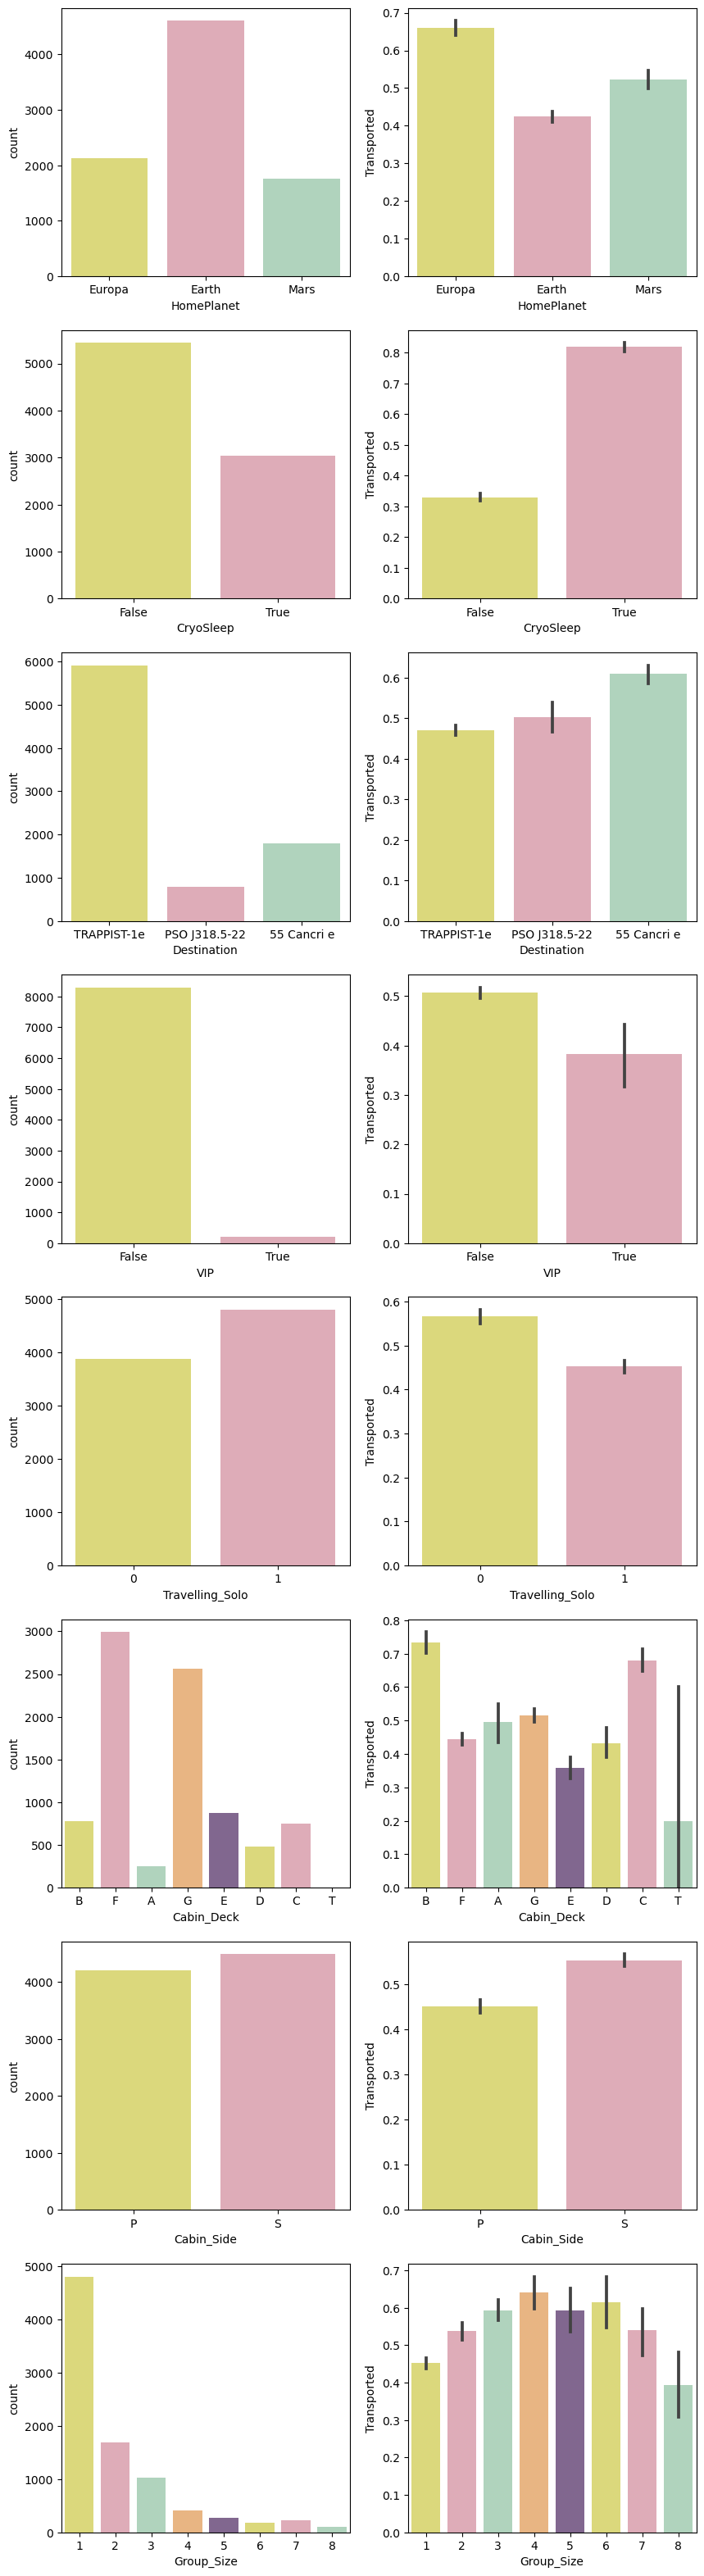

In [27]:
columns = 2
rows = len(cat_cols)

pal = ["#EBE76C","#E6A4B4", "#AAD9BB","#F9B572", "#836096"]
plt.figure(figsize=(columns*5, rows*5))

for i, col in enumerate(cat_cols):
    plt.subplot(rows, columns, (i*2)+1)
    sns.countplot(x=df[col], palette=pal)
    
    plt.subplot(rows, columns, (i*2)+2)
    sns.barplot(y='Transported', x=col, data=df, palette=pal)
    
    
plt.show()

<div style="display: flex; 
            align-items: center;">
  <p style="background: linear-gradient(to right,#FFE6E6,white);
            color: transparent;
            font-family: Georgia;
            color: black;
            font-size: 70%;
            text-align: left;
            padding: 5px;
            padding-left: 10px;
            width: 1000%;
            letter-spacing:1px;
            margin: 0px;">
      Observations
  </p>
</div>

- Most of the passengers were from Earth but comparetively, they're less transported
- People from Europa are highly trasported 
- People in cryosleep are more likely to be transported
- Most passengers' destination is TRAPPIST-le but passangers going to 55 cancri e were transported more
- VIPs are more likely to be transported
- Even though majority of the people were travelling solo, people in groups are more likely to be transported
- The frequency distribution of the VIP column is not good. One class is much much more than the other. So it might lead to overfitting. So better drop it

<div style="display: flex; 
            align-items: center;">
  <p style="background: linear-gradient(to right,#FFE6E6,white);
            color: transparent;
            font-family: Georgia;
            color: black;
            font-size: 70%;
            text-align: left;
            padding: 5px;
            padding-left: 10px;
            width: 1000%;
            letter-spacing:1px;
            margin: 0px;">
      Age feature
  </p>
</div>

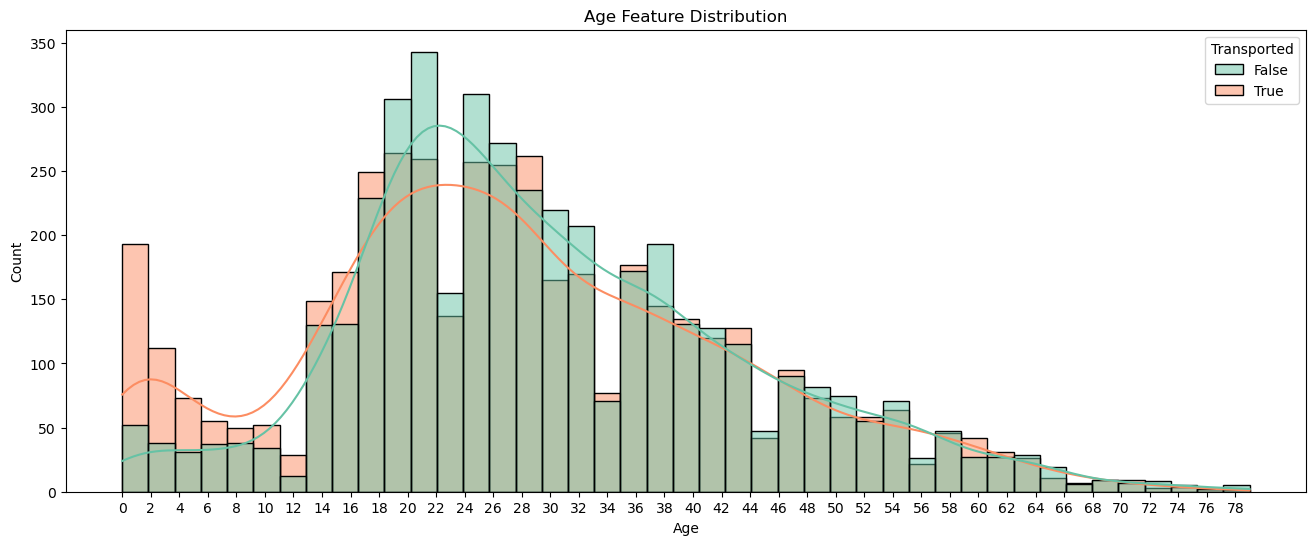

In [28]:
plt.figure(figsize=(16,6))
sns.histplot(x=df["Age"],hue=df["Transported"],kde=True,palette="Set2")
plt.xticks(np.arange(0, 80, step=2))
plt.title("Age Feature Distribution")
plt.show()

- People of below the age 18 were transported more than any other age group
- People between the age group of 18-32 are less transported compared to other groups
- People older than 32 seem to be equally transported compared to non-transported people in that age group
- Since there is a pattern in the age vs transported, let's split this feature into different categories

<div style="display: flex; 
            align-items: center;">
  <p style="background: linear-gradient(to right,#FFE6E6,white);
            color: transparent;
            font-family: Georgia;
            color: black;
            font-size: 70%;
            text-align: left;
            padding: 5px;
            padding-left: 10px;
            width: 1000%;
            letter-spacing:1px;
            margin: 0px;">
      All expenditure features
  </p>
</div>

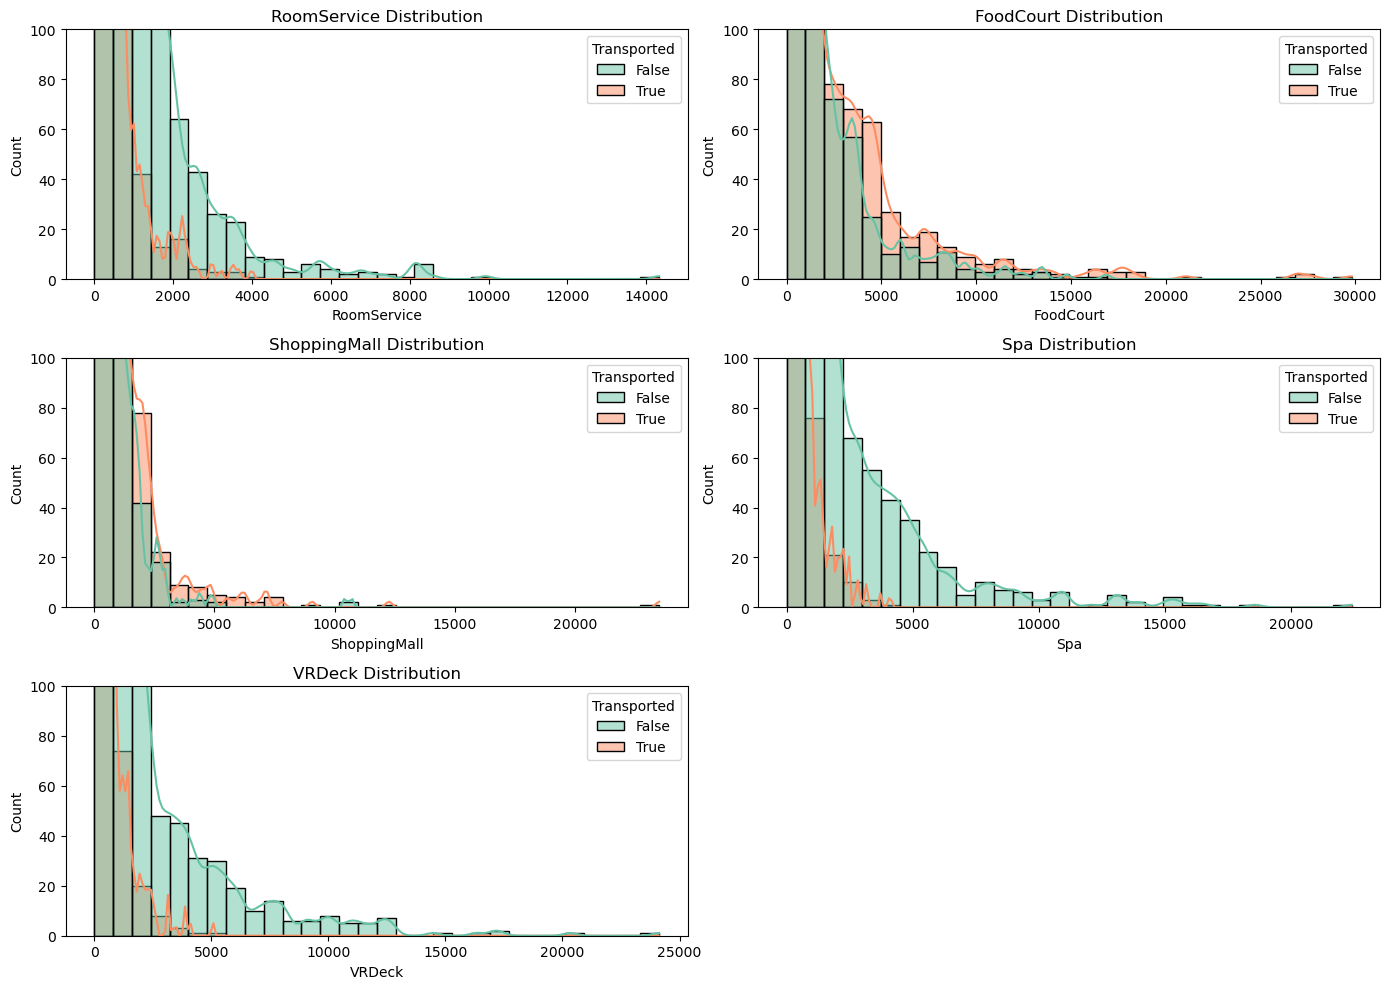

In [29]:
exp_cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

plt.figure(figsize=(14,10))
for idx,column in enumerate(exp_cols):
    plt.subplot(3,2,idx+1)
    sns.histplot(x=column, hue="Transported", data=df,bins=30,kde=True,palette="Set2")
    plt.title(f"{column} Distribution")
    plt.ylim(0,100)
    plt.tight_layout()
    

<div style="display: flex; 
            align-items: center;">
  <p style="background: linear-gradient(to right,#FFE6E6,white);
            color: transparent;
            font-family: Georgia;
            color: black;
            font-size: 70%;
            text-align: left;
            padding: 5px;
            padding-left: 10px;
            width: 1000%;
            letter-spacing:1px;
            margin: 0px;">
      Observations
  </p>
</div>

- Most people didn't spend money
- All the expenditure features are right skewed. So before Model Building we will transform these features to normal distribution using log-transformation
- We can create Total expenditure column which adds up all these expenses
- Then we can split total exp column into 3 categories (low, medium, high)

Cabin number distribution

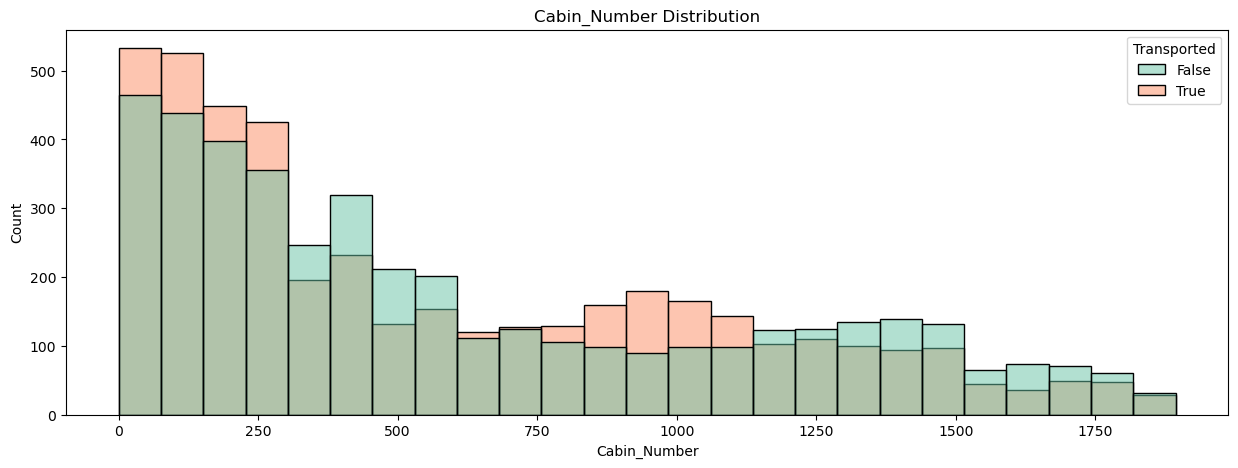

In [30]:
plt.figure(figsize=(15,5))
sns.histplot(x="Cabin_Number",data=df,hue="Transported",palette="Set2")
plt.title("Cabin_Number Distribution")

plt.show()

- Like the feature 'Age', we can see a pattern here also. So let's create different categories

<div style="display: flex; 
            align-items: center;">
  <p style="background: linear-gradient(to right,#FFE6E6,white);
            color: transparent;
            font-family: Georgia;
            color: black;
            font-size: 70%;
            text-align: left;
            padding: 5px;
            padding-left: 10px;
            width: 1000%;
            letter-spacing:1px;
            margin: 0px;">
      Creating a 'Total_Expenditure' column
  </p>
</div>

In [31]:
exp_cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

df['Total_Expenditure'] = df[exp_cols].sum(axis=1)

In [32]:
df.drop(exp_cols, inplace=True, axis=1)

<p style="background: linear-gradient(to right,#4793AF,white);
          color: transparent;
          font-family: Georgia;
          color: white;
          font-size: 120%;
          text-align: left;
          padding: 15px;
          letter-spacing:1px;">
   7. Data Preprocessing
</p>

<div style="display: flex; 
            align-items: center;">
  <div style="width: 30px; 
              height: 40px; 
              background-color: #4793AF;
              color: white;
              font-size: 70%;
              text-align: center;
              padding-top: 10px;">
      DP
  </div>
  <p style="background: linear-gradient(to right,#FC819E,white);
            color: transparent;
            font-family: Georgia;
            color: white;
            font-size: 100%;
            text-align: left;
            padding: 10px;
            width: 100%;
            letter-spacing:1px;
            margin: 0;">
      Handling Missing Values
  </p>
</div>


In [33]:
df.isnull().sum()

HomePlanet           201
CryoSleep            217
Destination          182
Age                  179
VIP                  203
Transported            0
Group_Size             0
Travelling_Solo        0
Cabin_Deck             0
Cabin_Number           0
Cabin_Side             0
Total_Expenditure      0
dtype: int64

In [34]:
# new categorical and continuous columns

cat_cols = ['HomePlanet', 'CryoSleep', 
            'Destination', 'VIP', 'Travelling_Solo', 
            'Cabin_Deck', 'Cabin_Side']

con_cols = ['Age', 'Group_Size', 'Total_Expenditure', 'Cabin_Number']


In [35]:
# imputing missing values

cat_imputer = SimpleImputer(strategy = 'most_frequent')
con_imputer = SimpleImputer(strategy = 'median')

In [36]:
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])
df[con_cols] = con_imputer.fit_transform(df[con_cols])


In [37]:
df.isnull().sum()

HomePlanet           0
CryoSleep            0
Destination          0
Age                  0
VIP                  0
Transported          0
Group_Size           0
Travelling_Solo      0
Cabin_Deck           0
Cabin_Number         0
Cabin_Side           0
Total_Expenditure    0
dtype: int64

No missing values now

<div style="display: flex; 
            align-items: center;">
  <div style="width: 30px; 
              height: 40px; 
              background-color: #4793AF;
              color: white;
              font-size: 70%;
              text-align: center;
              padding-top: 10px;">
      DP
  </div>
  <p style="background: linear-gradient(to right,#FC819E,white);
            color: transparent;
            font-family: Georgia;
            color: white;
            font-size: 100%;
            text-align: left;
            padding: 10px;
            width: 100%;
            letter-spacing:1px;
            margin: 0;">
      Log Transformation
  </p>
</div>


We observed that the all the expenditures were right skewed and 50% of the people didn't spend ANY money on these thiings. So we can conclude that there are lots of outliers in this feature. So we apply log transformation

In [38]:
df['Total_Expenditure'] = np.log(1 + df['Total_Expenditure'])

<div style="display: flex; 
            align-items: center;">
  <p style="background: linear-gradient(to right,#FFE6E6,white);
            color: transparent;
            font-family: Georgia;
            color: black;
            font-size: 70%;
            text-align: left;
            padding: 5px;
            padding-left: 10px;
            width: 1000%;
            letter-spacing:1px;
            margin: 0px;">
      Distribution after log transformation
  </p>
</div>

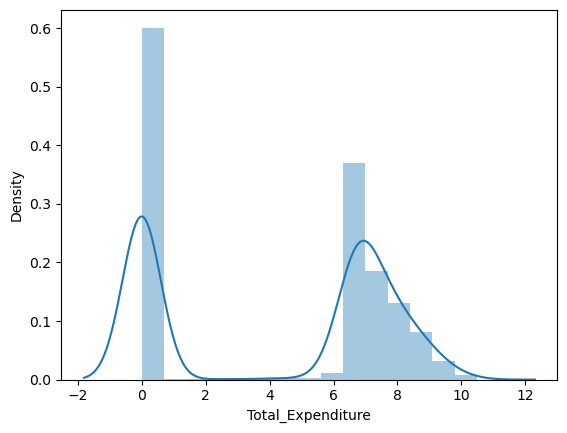

In [39]:
sns.distplot(df['Total_Expenditure'])
plt.show()

<div style="display: flex; 
            align-items: center;">
  <div style="width: 30px; 
              height: 40px; 
              background-color: #4793AF;
              color: white;
              font-size: 70%;
              text-align: center;
              padding-top: 10px;">
      DP
  </div>
  <p style="background: linear-gradient(to right,#FC819E,white);
            color: transparent;
            font-family: Georgia;
            color: white;
            font-size: 100%;
            text-align: left;
            padding: 10px;
            width: 100%;
            letter-spacing:1px;
            margin: 0;">
      Feature Encoding
  </p>
</div>


<div style="display: flex; 
            align-items: center;">
  <p style="background: linear-gradient(to right,#FFE6E6,white);
            color: transparent;
            font-family: Georgia;
            color: black;
            font-size: 70%;
            text-align: left;
            padding: 5px;
            padding-left: 10px;
            width: 1000%;
            letter-spacing:1px;
            margin: 0px;">
      Bool Features
  </p>
</div>

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HomePlanet         8693 non-null   object 
 1   CryoSleep          8693 non-null   object 
 2   Destination        8693 non-null   object 
 3   Age                8693 non-null   float64
 4   VIP                8693 non-null   object 
 5   Transported        8693 non-null   bool   
 6   Group_Size         8693 non-null   float64
 7   Travelling_Solo    8693 non-null   object 
 8   Cabin_Deck         8693 non-null   object 
 9   Cabin_Number       8693 non-null   float64
 10  Cabin_Side         8693 non-null   object 
 11  Total_Expenditure  8693 non-null   float64
dtypes: bool(1), float64(4), object(7)
memory usage: 1.1+ MB


In [41]:
# columns whose values are boolean
bool_cols = ['CryoSleep', 'VIP', 'Travelling_Solo']

for col in bool_cols:
    df[col] = df[col].astype(bool)
    

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HomePlanet         8693 non-null   object 
 1   CryoSleep          8693 non-null   bool   
 2   Destination        8693 non-null   object 
 3   Age                8693 non-null   float64
 4   VIP                8693 non-null   bool   
 5   Transported        8693 non-null   bool   
 6   Group_Size         8693 non-null   float64
 7   Travelling_Solo    8693 non-null   bool   
 8   Cabin_Deck         8693 non-null   object 
 9   Cabin_Number       8693 non-null   float64
 10  Cabin_Side         8693 non-null   object 
 11  Total_Expenditure  8693 non-null   float64
dtypes: bool(4), float64(4), object(4)
memory usage: 903.2+ KB


In [43]:
# non-ordinl columns. there is no hierarchy 
nominal_cols = ['HomePlanet', 'Destination']

# ordinal columns
ordinal_cols = ['Cabin_Deck', 'Cabin_Side']

- For nominal features, apply one-hot encoding
- For ordinal features, apply label encoding

<div style="display: flex; 
            align-items: center;">
  <p style="background: linear-gradient(to right,#FFE6E6,white);
            color: transparent;
            font-family: Georgia;
            color: black;
            font-size: 80%;
            text-align: left;
            padding: 5px;
            padding-left: 10px;
            width: 1000%;
            letter-spacing:1px;
            margin: 0px;">
      Label Encoding
  </p>
</div>

In [44]:
le = LabelEncoder()
df[ordinal_cols] = df[ordinal_cols].apply(le.fit_transform)

<div style="display: flex; 
            align-items: center;">
  <p style="background: linear-gradient(to right,#FFE6E6,white);
            color: transparent;
            font-family: Georgia;
            color: black;
            font-size: 80%;
            text-align: left;
            padding: 5px;
            padding-left: 10px;
            width: 1000%;
            letter-spacing:1px;
            margin: 0px;">
      One-hot Encoding
  </p>
</div>

In [45]:
df = pd.get_dummies(df, columns=nominal_cols)

Target column - Convert it to numerical values

In [46]:
df['Transported'] = df['Transported'].replace({'False':0, 'True':1})

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   bool   
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   bool   
 3   Transported                8693 non-null   bool   
 4   Group_Size                 8693 non-null   float64
 5   Travelling_Solo            8693 non-null   bool   
 6   Cabin_Deck                 8693 non-null   int64  
 7   Cabin_Number               8693 non-null   float64
 8   Cabin_Side                 8693 non-null   int64  
 9   Total_Expenditure          8693 non-null   float64
 10  HomePlanet_Earth           8693 non-null   uint8  
 11  HomePlanet_Europa          8693 non-null   uint8  
 12  HomePlanet_Mars            8693 non-null   uint8  
 13  Destination_55 Cancri e    8693 non-null   uint8

<div style="display: flex; 
            align-items: center;">
  <div style="width: 30px; 
              height: 40px; 
              background-color: #4793AF;
              color: white;
              font-size: 70%;
              text-align: center;
              padding-top: 10px;">
      FE
  </div>
  <p style="background: linear-gradient(to right,#FC819E,white);
            color: transparent;
            font-family: Georgia;
            color: white;
            font-size: 100%;
            text-align: left;
            padding: 10px;
            width: 100%;
            letter-spacing:1px;
            margin: 0;">
      Creating Training and testing sets
  </p>
</div>


In [48]:
x = df.drop(['Transported'], axis=1)
y = df.Transported

In [49]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=2)


<p style="background: linear-gradient(to right,#4793AF,white);
          color: transparent;
          font-family: Georgia;
          color: white;
          font-size: 120%;
          text-align: left;
          padding: 15px;
          letter-spacing:1px;">
   8. Machine Learning
</p>

In [50]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB(),
    'K neighbors': KNeighborsClassifier(),
    'LGBM': LGBMClassifier()
}

In [51]:
# defining a funciton which outputs a list of 2 items
# 1st: accuracy score with the training set
# 1st: accuracy score with the testing set
def model_prediction(mode, xtrain=xtrain, xtest=xtest, ytrain=ytrain, ytest=ytest):
    model.fit(xtrain, ytrain)
    train_pred = model.predict(xtrain)
    train_acc = accuracy_score(train_pred, ytrain)
    
    test_pred = model.predict(xtest)
    test_acc = accuracy_score(test_pred, ytest)
    return [train_acc, test_acc]


<div style="display: flex; 
            align-items: center;">
  <div style="width: 30px; 
              height: 40px; 
              background-color: #4793AF;
              color: white;
              font-size: 70%;
              text-align: center;
              padding-top: 10px;">
      ML
  </div>
  <p style="background: linear-gradient(to right,#FC819E,white);
            color: transparent;
            font-family: Georgia;
            color: white;
            font-size: 100%;
            text-align: left;
            padding: 10px;
            width: 100%;
            letter-spacing:1px;
            margin: 0;">
      Training with Un-scaled features
  </p>
</div>


In [52]:
results = {}

for name, model in models.items():
    results[name] = model_prediction(model)
    
results

{'Logistic Regression': [0.73278553820871, 0.7396472392638037],
 'Random Forest': [0.9998356614626129, 0.7450153374233128],
 'Support Vector Machine': [0.5574363188167625, 0.566717791411043],
 'Naive Bayes': [0.7129005751848808, 0.7212423312883436],
 'K neighbors': [0.7700903861955629, 0.6675613496932515],
 'LGBM': [0.8430566967953985, 0.7630368098159509]}

<div style="display: flex; 
            align-items: center;">
  <div style="width: 30px; 
              height: 40px; 
              background-color: #4793AF;
              color: white;
              font-size: 70%;
              text-align: center;
              padding-top: 10px;">
      ML
  </div>
  <p style="background: linear-gradient(to right,#FC819E,white);
            color: transparent;
            font-family: Georgia;
            color: white;
            font-size: 100%;
            text-align: left;
            padding: 10px;
            width: 100%;
            letter-spacing:1px;
            margin: 0;">
      Training with scaled features
  </p>
</div>


<div style="display: flex; 
            align-items: center;">
  <p style="background: linear-gradient(to right,#FFE6E6,white);
            color: transparent;
            font-family: Georgia;
            color: black;
            font-size: 70%;
            text-align: left;
            padding: 5px;
            padding-left: 10px;
            width: 1000%;
            letter-spacing:1px;
            margin: 0px;">
      Scaling the Data
  </p>
</div>

In [53]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

x_scaled_train, x_scaled_test, ytrain, ytest = train_test_split(x_scaled, y, test_size=0.3, random_state=2)


In [54]:
scaled_results = {}

for name, model in models.items():
    scaled_results[name] = model_prediction(model, xtrain=x_scaled_train, xtest=x_scaled_test)
    
scaled_results

{'Logistic Regression': [0.7319638455217748, 0.7427147239263804],
 'Random Forest': [0.9998356614626129, 0.7388803680981595],
 'Support Vector Machine': [0.7447822514379622, 0.7438650306748467],
 'Naive Bayes': [0.7127362366474939, 0.7212423312883436],
 'K neighbors': [0.8023007395234183, 0.7296779141104295],
 'LGBM': [0.838783894823336, 0.7565184049079755]}

Scaled and un-scaled data don't have much differences in the accuracy_scores. So let's proceed with unscaled data for simplicity

<div style="display: flex; 
            align-items: center;">
  <div style="width: 30px; 
              height: 40px; 
              background-color: #4793AF;
              color: white;
              font-size: 70%;
              text-align: center;
              padding-top: 10px;">
      ML
  </div>
  <p style="background: linear-gradient(to right,#FC819E,white);
            color: transparent;
            font-family: Georgia;
            color: white;
            font-size: 100%;
            text-align: left;
            padding: 10px;
            width: 100%;
            letter-spacing:1px;
            margin: 0;">
      All performance comparision
  </p>
</div>


In [55]:
# converting our model performances toa dataframe
result = pd.DataFrame(results).T
result.columns = ['Training_Score', 'Testing_Score']
result

,Training_Score,Testing_Score
Logistic Regression,0.732786,0.739647
Random Forest,0.999836,0.745015
Support Vector Machine,0.557436,0.566718
Naive Bayes,0.712901,0.721242
K neighbors,0.770090,0.667561
LGBM,0.843057,0.763037


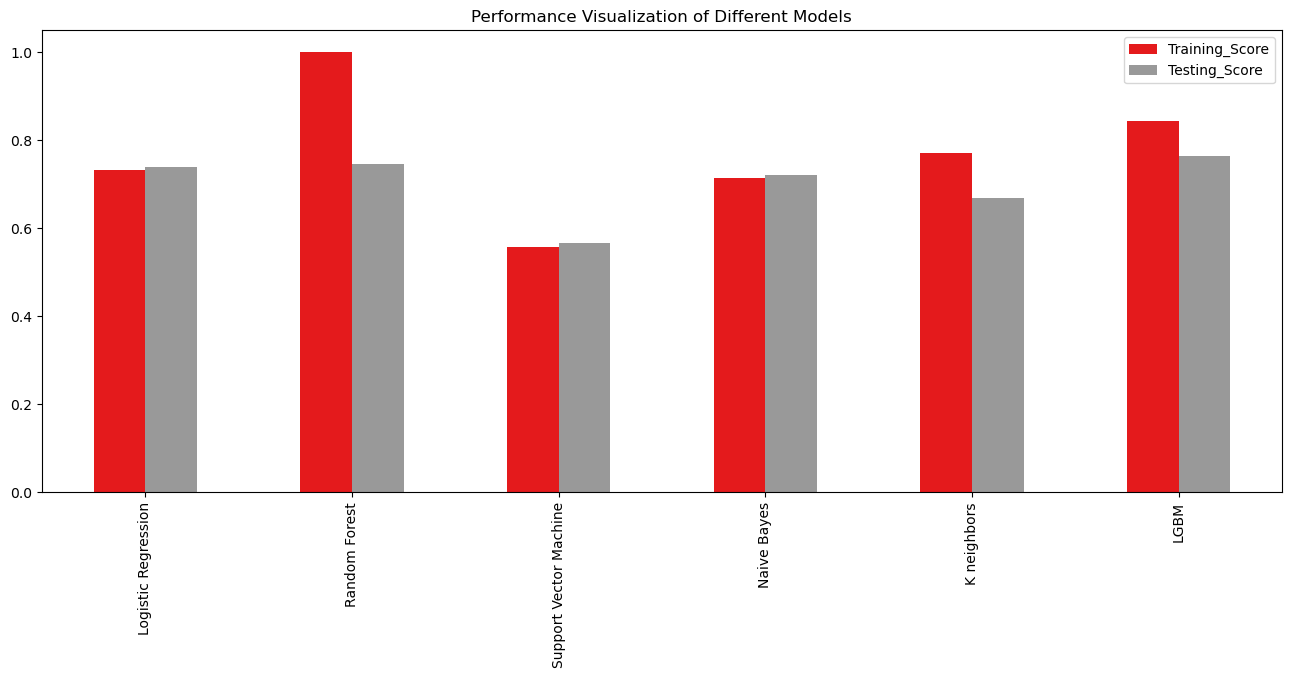

In [56]:
# plotting the results
result.plot(kind='bar', figsize=(16,6),
           title="Performance Visualization of Different Models",
            colormap="Set1")
plt.show()


<div style="display: flex; 
            align-items: center;">
  <p style="background: linear-gradient(to right,#FFE6E6,white);
            color: transparent;
            font-family: Georgia;
            color: black;
            font-size: 70%;
            text-align: left;
            padding: 5px;
            padding-left: 10px;
            width: 1000%;
            letter-spacing:1px;
            margin: 0px;">
      Observations
  </p>
</div>

- Even though random forest works very well for the training set, it fails to produce a similar result in testing set. So this might indicate overfitting. 
- Overall, LGBM seems to be giving the best result on both training and testing sets
- Let's go ahead with these two models and see which performs better

<div style="display: flex; 
            align-items: center;">
  <div style="width: 30px; 
              height: 40px; 
              background-color: #4793AF;
              color: white;
              font-size: 70%;
              text-align: center;
              padding-top: 10px;">
      FE
  </div>
  <p style="background: linear-gradient(to right,#FC819E,white);
            color: transparent;
            font-family: Georgia;
            color: white;
            font-size: 100%;
            text-align: left;
            padding: 10px;
            width: 100%;
            letter-spacing:1px;
            margin: 0;">
      Hyperparameter Tuning
  </p>
</div>


<div style="display: flex; 
            align-items: center;">
  <p style="background: linear-gradient(to right,#FFE6E6,white);
            color: transparent;
            font-family: Georgia;
            color: black;
            font-size: 70%;
            text-align: left;
            padding: 5px;
            padding-left: 10px;
            width: 1000%;
            letter-spacing:1px;
            margin: 0px;">
      Hyper Parameter Tuning for LGBM Model
  </p>
</div>

In [57]:
parameters1 = {"n_estimators":[100,300,500,600,650],
              "learning_rate":[0.01,0.02,0.03],
              "random_state":[0,42,48,50],
               "num_leaves":[16,17,18]}

grid_search1 = GridSearchCV(LGBMClassifier(), parameters1, cv=5, n_jobs=-1)

grid_search1.fit(xtrain,ytrain.values.ravel())



GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03],
                         'n_estimators': [100, 300, 500, 600, 650],
                         'num_leaves': [16, 17, 18],
                         'random_state': [0, 42, 48, 50]})

In [58]:
grid_search1.best_score_


0.7590797041906328

In [59]:
best_parameters1 = grid_search1.best_params_
best_parameters1


{'learning_rate': 0.02,
 'n_estimators': 650,
 'num_leaves': 16,
 'random_state': 0}

Creating LGBM Model with the best parameters

In [60]:
lgbm_model = LGBMClassifier(**best_parameters1)
lgbm_model.fit(xtrain, ytrain)

lgbm_pred1 = lgbm_model.predict(xtrain)
lgbm_pred2 = lgbm_model.predict(xtest)

lgbm_scores = [accuracy_score(lgbm_pred1, ytrain),
               accuracy_score(lgbm_pred2, ytest)]
lgbm_scores

[0.8141331142152834, 0.7618865030674846]

The testing set score is better now also the different between the scores in the training and testing sets is reduced. This indicates that there is no iverfitting or underfitting

<div style="display: flex; 
            align-items: center;">
  <p style="background: linear-gradient(to right,#FFE6E6,white);
            color: transparent;
            font-family: Georgia;
            color: black;
            font-size: 70%;
            text-align: left;
            padding: 5px;
            padding-left: 10px;
            width: 1000%;
            letter-spacing:1px;
            margin: 0px;">
      Hyper Parameter Tuning for Random Forest Model
  </p>
</div>

In [61]:
parameters2 = {'n_estimators': [100,300,500,550],
               'min_samples_split':[7,8,9],
               'max_depth': [10,11,12], 
               'min_samples_leaf':[4,5,6]}
    
grid_search2 = GridSearchCV(RandomForestClassifier(), parameters2, cv=5, n_jobs=-1)

grid_search2.fit(xtrain,ytrain.values.ravel())


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [7, 8, 9],
                         'n_estimators': [100, 300, 500, 550]})

In [62]:
grid_search2.best_score_

0.7488907148726376

In [63]:
best_parameters2 = grid_search2.best_params_
best_parameters2

{'max_depth': 12,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 300}

Training Random Forest with the best Parameters

In [64]:
rf_model = RandomForestClassifier(**best_parameters2)
rf_model.fit(xtrain, ytrain)

rf_pred1 = rf_model.predict(xtrain)
rf_pred2 = rf_model.predict(xtest)

rf_scores = [accuracy_score(rf_pred1, ytrain), accuracy_score(rf_pred2, ytest)]
rf_scores


[0.8046014790468364, 0.763420245398773]

Now, There is clearly no overfitting because there's no significant difference in the accuracy scores of training and testing sets and this model seems to be giving a little better accuracy compared to LGBM Model

<p style="background: linear-gradient(to right,#4793AF,white);
          color: transparent;
          font-family: Georgia;
          color: white;
          font-size: 120%;
          text-align: left;
          padding: 15px;
          letter-spacing:1px;">
   9. Conclusion
</p>

- Both **LGBM** and **Random Forest** algorithms seem to give good results of 76% after hyperparameter tuning